In [1]:
#######################################################################
# Copyright (C)                                                       #
# 2016 Shangtong Zhang(zhangshangtong.cpp@gmail.com)                  #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# all states
N_STATES = 19

# discount
GAMMA = 1

# initial state values
stateValues = np.zeros(N_STATES + 2)

# all states but terminal states
states = np.arange(1, N_STATES + 1)

# start from the middle state
START_STATE = 10

# two terminal states
# an action leading to the left terminal state has reward -1
# an action leading to the right terminal state has reward 1
END_STATES = [0, N_STATES + 1]

# true state value from bellman equation
realStateValues = np.arange(-20, 22, 2) / 20.0
realStateValues[0] = realStateValues[-1] = 0

In [10]:
# n-steps TD method
# @stateValues: values for each state, will be updated
# @n: # of steps
# @alpha: # step size
def temporalDifference(stateValues, n, alpha):
    # initial starting state
    currentState = START_STATE

    # arrays to store states and rewards for an episode
    # space isn't a major consideration, so I didn't use the mod trick
    states = [currentState]
    rewards = [0]

    # track the time
    time = 0

    # the length of this episode
    T = float('inf')
    while True:
        # go to next time step
        time += 1

        if time < T:
            # choose an action randomly
            if np.random.binomial(1, 0.5) == 1:
                newState = currentState + 1
            else:
                newState = currentState - 1
            if newState == 0:
                reward = -1
            elif newState == 20:
                reward = 1
            else:
                reward = 0

            # store new state and new reward
            states.append(newState)
            rewards.append(reward)

            if newState in END_STATES:
                T = time

        # get the time of the state to update
        updateTime = time - n
        if updateTime >= 0:
            returns = 0.0
            # calculate corresponding rewards
            for t in range(updateTime + 1, min(T, updateTime + n) + 1):
                returns += pow(GAMMA, t - updateTime - 1) * rewards[t]
            # add state value to the return
            if updateTime + n <= T:
                returns += pow(GAMMA, n) * stateValues[states[(updateTime + n)]]
            stateToUpdate = states[updateTime]
            # update the state value
            if not stateToUpdate in END_STATES:
                stateValues[stateToUpdate] += alpha * (returns - stateValues[stateToUpdate])
        if updateTime == T - 1:
            break
        currentState = newState

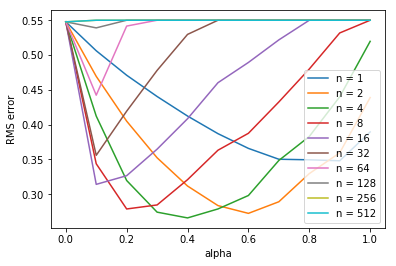

In [11]:
def figure7_2():
    # truncate value for better display
    truncateValue = 0.55

    # all possible steps
    steps = np.power(2, np.arange(0, 10))

    # all possible alphas
    alphas = np.arange(0, 1.1, 0.1)

    # each run has 10 episodes
    episodes = 10

    # perform 100 independent runs
    runs = 100

    # track the errors for each (step, alpha) combination
    errors = np.zeros((len(steps), len(alphas)))
    for run in range(0, runs):
        for stepInd, step in zip(range(len(steps)), steps):
            for alphaInd, alpha in zip(range(len(alphas)), alphas):
                #print('run:', run, 'step:', step, 'alpha:', alpha)
                currentStateValues = np.copy(stateValues)
                for ep in range(0, episodes):
                    temporalDifference(currentStateValues, step, alpha)
                    # calculate the RMS error
                    errors[stepInd, alphaInd] += np.sqrt(np.sum(np.power(currentStateValues - realStateValues, 2)) / N_STATES)
    # take average
    errors /= episodes * runs
    # truncate the error
    errors[errors > truncateValue] = truncateValue
    plt.figure()
    for i in range(0, len(steps)):
        plt.plot(alphas, errors[i, :], label='n = ' + str(steps[i]))
    plt.xlabel('alpha')
    plt.ylabel('RMS error')
    plt.legend()

figure7_2()